In [29]:
from gensim.models import Word2Vec

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns

import ast

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# read data
df = pd.read_csv('../data/twitter/processed.csv', encoding='latin-1')
df['processed_text'] = df['processed_text'].apply(lambda x: ast.literal_eval(x))

In [3]:
df.head()

,target,text,processed_text
0,0,@AngieMC1966 Oh wow. I am so sorry. That's a r...,"[angiemc1966, oh, wow, i, am, so, sorry, thats..."
1,0,Tired. Sleepy. Exhausted. Need my beauty sleep!,"[tired, sleepy, exhausted, need, my, beauty, s..."
2,1,@Net I wouldn't bet on it...,"[net, i, wouldnt, bet, on, it]"
3,1,"I intend to live forever - so far, so good","[i, intend, to, live, forever, so, far, so, good]"
4,0,Such bad pains,"[such, bad, pain]"


In [4]:
# download word2vec model: use best-performing one based on qualitative evaluation
w2v_model = Word2Vec.load('./models/word2vec/skipgram_300_5_15.model')

In [13]:
# use word2vec to vectorize each token, and create sentence embeddings by averaging word vectors of one sentence
def get_sentence_embedding(tokens):
    vectors = []
    for token in tokens:
        if token in w2v_model.wv:
            vectors.append(w2v_model.wv[token])
    return np.mean(vectors, axis=0)

df['sentence_embeddings'] = df['processed_text'].apply(get_sentence_embedding)

In [14]:
df.head()

,target,text,processed_text,sentence_embeddings
0,0,@AngieMC1966 Oh wow. I am so sorry. That's a r...,"[angiemc1966, oh, wow, i, am, so, sorry, thats...","[-0.041482218, 0.25439268, 0.0312128, 0.001795..."
1,0,Tired. Sleepy. Exhausted. Need my beauty sleep!,"[tired, sleepy, exhausted, need, my, beauty, s...","[-0.03600153, 0.13155481, 0.057499416, -0.1205..."
2,1,@Net I wouldn't bet on it...,"[net, i, wouldnt, bet, on, it]","[-0.03337385, 0.22903912, -0.051997546, 0.0053..."
3,1,"I intend to live forever - so far, so good","[i, intend, to, live, forever, so, far, so, good]","[-0.12137433, 0.13429996, 0.11655433, -0.04034..."
4,0,Such bad pains,"[such, bad, pain]","[-0.2233278, 0.3276329, 0.13694517, -0.0469175..."


In [18]:
# split data into train and test
X = np.vstack(df['sentence_embeddings'].values)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=42,
    stratify=df['target'],
    test_size=0.2
)


### Random Forest Classifier

In [25]:
clf = RandomForestClassifier(random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
def evaluate_model(y_test, y_pred):
    # Accuracy
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Classification report (precision, recall, f1)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

Accuracy: 0.7323
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      5000
           1       0.74      0.72      0.73      5000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



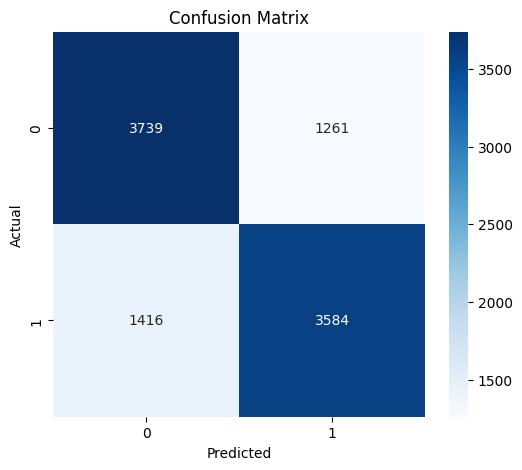

In [32]:
# evaluate on test set
y_pred = clf.predict(X_test)

evaluate_model(y_test, y_pred)

### Logistic Regression

In [33]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Accuracy: 0.7488
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      5000
           1       0.75      0.76      0.75      5000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



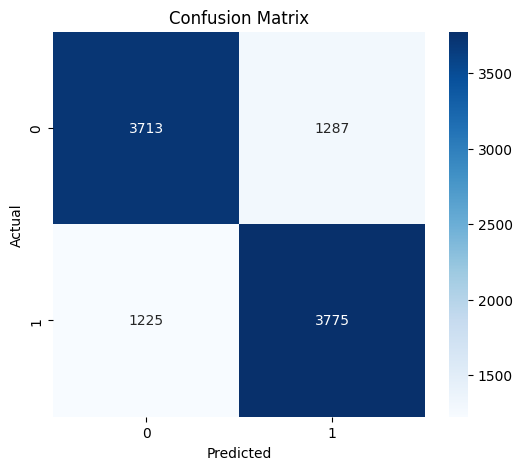

In [34]:
# evaluate on test set
y_pred = clf.predict(X_test)

evaluate_model(y_test, y_pred)

Logistic Regression performs better on the word2vec embeddings compared to Random Forest